In [124]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from skimage import feature
from sklearn.preprocessing import StandardScaler
from sklearn import multiclass
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import regularizers
from scipy import stats

In [125]:
from tensorflow.keras import utils
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [126]:
# Using methods from other notebook
%run preprocessing_functions.ipynb

In [127]:
# Loading fer2013 dataset, it's already split in train and test data
train_data, train_labels = load_data('datasets/ck+/')
train_data, test_data, train_labels, test_labels=train_test_split(train_data, train_labels, 
                                                                  random_state=0, test_size=0.25)

In [128]:
# As we see, train dataset consists of 327 images of 48 x 48 px
print(train_data.shape)
print(test_data.shape)

(245, 48, 48)
(82, 48, 48)


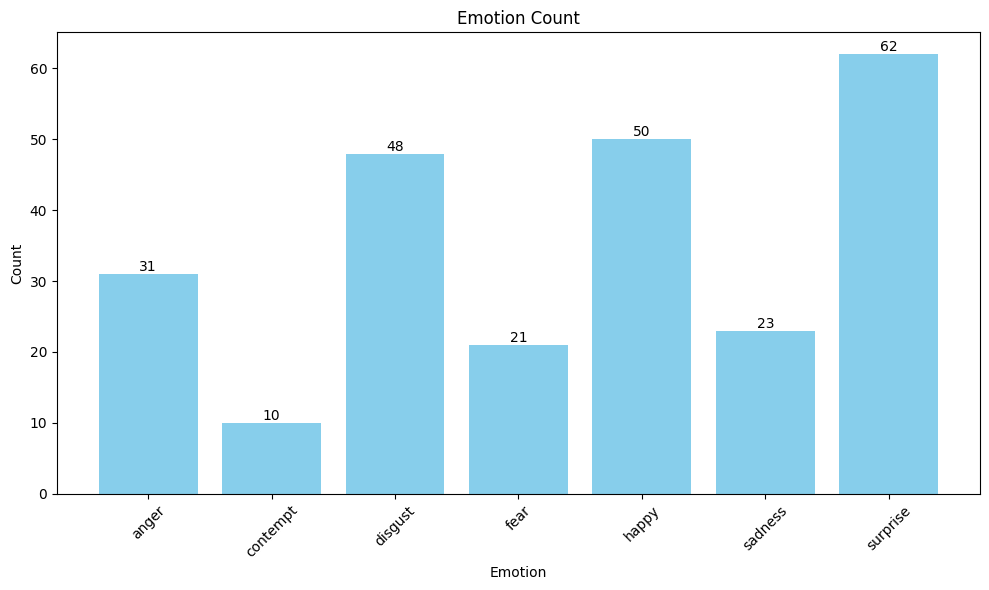

In [129]:
plot_count(train_data, train_labels)

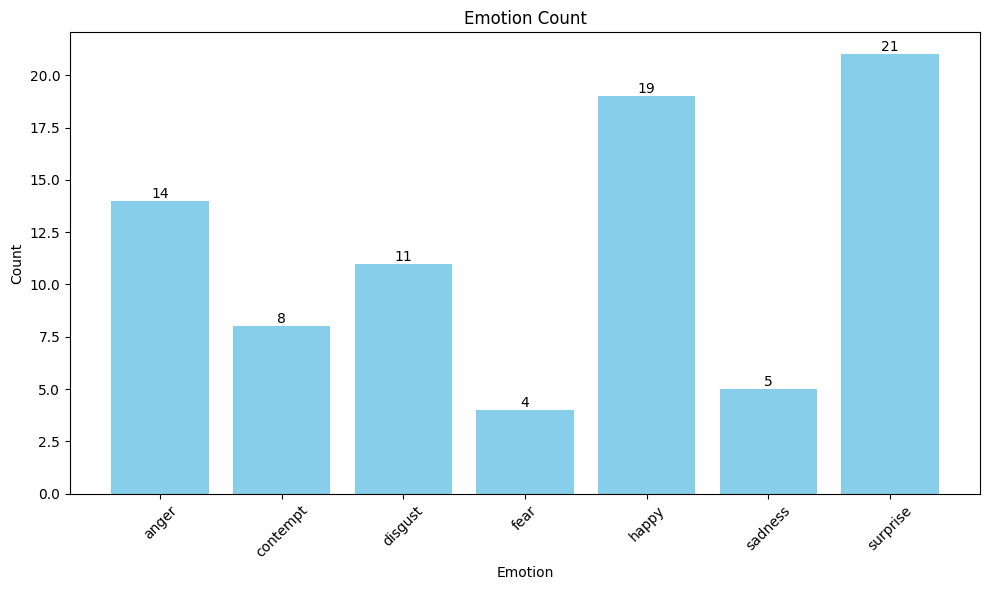

In [130]:
plot_count(test_data, test_labels)

In [131]:
# Here, we'll use different approach to unbalanced data. Because disgust is much smaller class than the others, 
#we'll make more models, and use voting when we testing

In [132]:
train_data, train_labels = add_mirrored_images_upto(train_data, train_labels, upto=4*11, include=["contempt", "disgust", "fear", "sadness"])

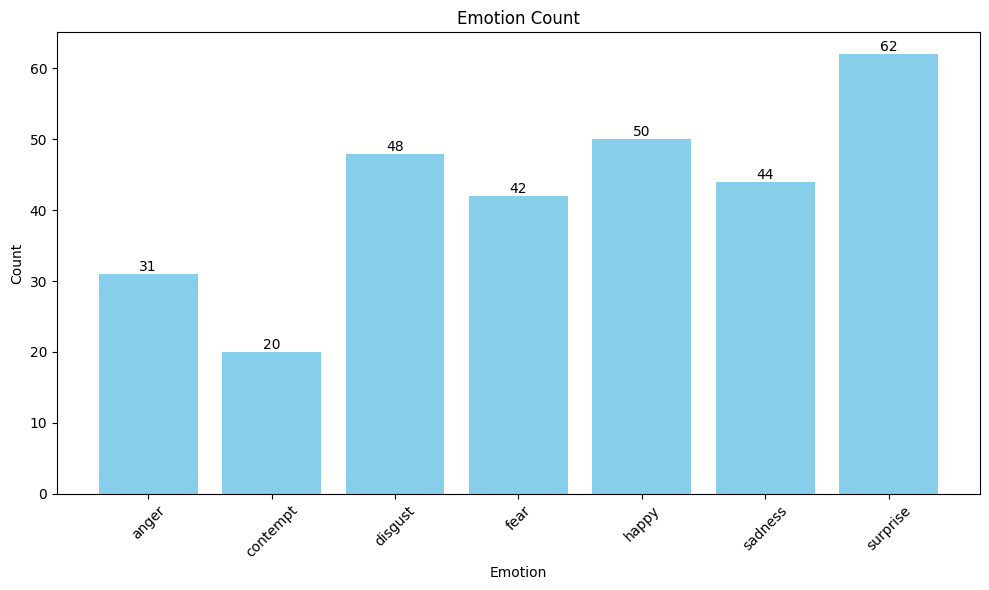

In [133]:
plot_count(train_data, train_labels)

In [134]:
seed = 12
#train_data, train_labels = random_delete_upto_2(train_data, train_labels, "anger", 20*11, seed)
#train_data, train_labels = random_delete_upto_2(train_data, train_labels, "contempt", 20*11, seed)
#train_data, train_labels = random_delete_upto_2(train_data, train_labels, "fear", 20*11, seed)

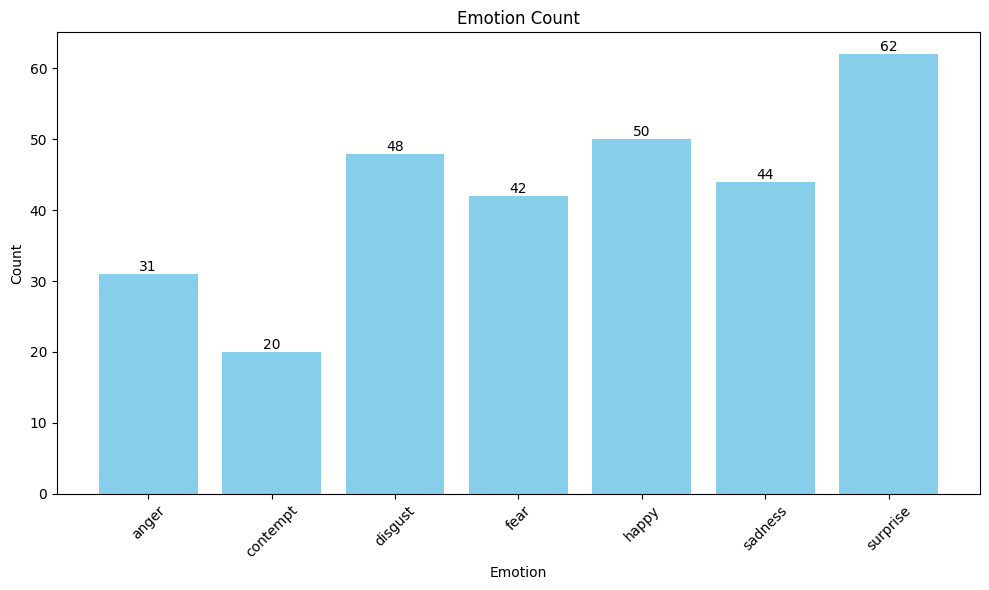

In [59]:
plot_count(train_data, train_labels)

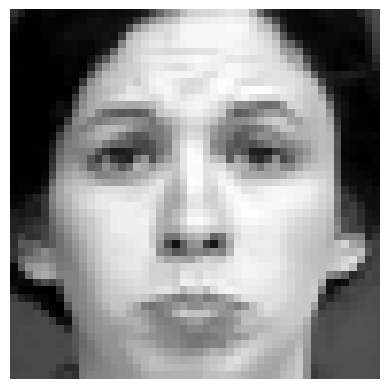

sadness


In [135]:
plot_image(train_data[0], train_labels[0])

In [136]:
print(train_data[0].shape)
print(train_labels[0])

ROWS=48
COLS=48
NUM_OF_CHANNELS=1
NUM_OF_CLASSES=7
K.image_data_format()

(48, 48)
sadness


'channels_last'

In [137]:
#train_data.shape
train_data=np.array(train_data)
test_data=np.array(test_data)
train_data = train_data.reshape(train_data.shape[0], ROWS, COLS, 1)
test_data = test_data.reshape(test_data.shape[0], ROWS, COLS, 1)
input_shape = (ROWS, COLS, 1)

In [138]:
print(train_data.shape)
print(test_data.shape)

(297, 48, 48, 1)
(82, 48, 48, 1)


In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [140]:
alexnet_model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(1,1), padding='same', activation='relu', input_shape=(ROWS, COLS, NUM_OF_CHANNELS)),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dense(NUM_OF_CLASSES, activation='softmax')
    #Dense(1, activation='softmax')
])

In [141]:
alexnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 96)        11712     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 384)       885120    
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 384)      

In [142]:
print(test_data.shape)
print(test_labels.shape)
print('-------------------')
print(train_data.shape)
print(train_labels.shape)

(82, 48, 48, 1)
(82,)
-------------------
(297, 48, 48, 1)
(297,)


In [143]:
train_data=train_data.astype('float32')
train_data/=255

In [144]:
test_data=test_data.astype('float32')
test_data/=255

In [145]:
EPOCHS = 20
BATCH_SIZE = 128

train_data=np.array(train_data)
train_labels=np.array(train_labels)
train_labels_new=[]
for label in train_labels:
    if label=='anger':
        train_labels_new.append(0)
    if label=='contempt':
        train_labels_new.append(1)
    if label=='disgust':
        train_labels_new.append(2)
    if label=='fear':
        train_labels_new.append(3)
    if label=='happy':
        train_labels_new.append(4)
    if label=='sadness':
        train_labels_new.append(5)
    if label=='surprise':
        train_labels_new.append(6)
train_labels_new=np.array(train_labels_new)
print(train_labels_new.shape)
train_labels=train_labels_new

(297,)


In [146]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)
test_labels_new=[]
for label in test_labels:
    if label=='anger':
        test_labels_new.append(0)
    if label=='contempt':
        test_labels_new.append(1)
    if label=='disgust':
        test_labels_new.append(2)
    if label=='fear':
        test_labels_new.append(3)
    if label=='happy':
        test_labels_new.append(4)
    if label=='sadness':
        test_labels_new.append(5)
    if label=='surprise':
        test_labels_new.append(6)
test_labels_new=np.array(test_labels_new)
print(test_labels_new.shape)
test_labels=test_labels_new

(82,)


In [147]:
print(train_labels[0])
print(train_data.shape)
set_labels=set()
for label in train_labels:
    #print(y)
    if label not in set_labels:
        set_labels.add(label)
        print(label)

5
(297, 48, 48, 1)
5
6
2
0
4
3
1


In [148]:
number_of_classes = 7

#y_train = utils.to_categorical(y_train, number_of_classes)
#y_test = utils.to_categorical(y_test, number_of_classes)
train_labels=utils.to_categorical(train_labels, number_of_classes)
test_labels=utils.to_categorical(test_labels, number_of_classes)

In [149]:
print(train_labels[0])
print(test_labels[0])

[0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0.]


In [116]:
alexnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

In [117]:
# Now, we can let our model to train!
#history = alexnet_model.fit(train_data, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, verbose=1)

In [ ]:
# After training our model, we will show the values of loss function and accuracy function
# on training and validation set throught epochs!
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Loss function on training and validation set')
plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy on training and validation set')
plt.plot(history.epoch, history.history['accuracy'], label='train')
plt.plot(history.epoch, history.history['val_accuracy'], label='val')
plt.legend(loc='best')

# U slučaju da želite da sačuvate sliku grafika otkomentarišite liniju ispod
plt.savefig('the_first_results.png')

plt.show()

In [ ]:
#model.evaluate(X_test, y_test)
# Here we will evaluate the model of our interest on test data!
model=alexnet_model
score=model.evaluate(test_data, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
score=model.evaluate(train_data, train_labels)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Predviđene vrednosti modela za test podatke
# Predicted values of model for the test data!

X_test=test_data
y_test=test_labels
y_predicted = model.predict(X_test)
y_predicted_classes = np.argmax(y_predicted, axis = 1)

In [ ]:
print(y_predicted_classes.shape)
y_test_classes = np.argmax(y_test, axis = 1)
print(y_test_classes.shape)


In [ ]:
confusion_matrix= confusion_matrix(y_test_classes, y_predicted_classes)
print(confusion_matrix)

In [ ]:
report = classification_report(y_test_classes, y_predicted_classes)
print(report)

In [82]:
# We will now try to test different model!

In [150]:
model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(number_of_classes, activation='softmax')
])

In [151]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 36864)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               4718720   
                                                      

In [152]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [153]:
batch_size = 128
epochs = 20

X_train=train_data
y_train=train_labels
X_test=test_data
y_test=test_labels

In [158]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
2/2 [==============================] - 0s 164ms/step - loss: 0.1773 - accuracy: 0.9367 - val_loss: 0.6044 - val_accuracy: 0.8000
Epoch 2/20
2/2 [==============================] - 0s 147ms/step - loss: 0.1704 - accuracy: 0.9578 - val_loss: 0.5984 - val_accuracy: 0.8000
Epoch 3/20
2/2 [==============================] - 0s 130ms/step - loss: 0.1365 - accuracy: 0.9747 - val_loss: 0.6219 - val_accuracy: 0.7833
Epoch 4/20
2/2 [==============================] - 0s 131ms/step - loss: 0.1162 - accuracy: 0.9662 - val_loss: 0.6219 - val_accuracy: 0.7833
Epoch 5/20
2/2 [==============================] - 0s 130ms/step - loss: 0.1340 - accuracy: 0.9494 - val_loss: 0.5916 - val_accuracy: 0.7833
Epoch 6/20
2/2 [==============================] - 0s 129ms/step - loss: 0.1310 - accuracy: 0.9747 - val_loss: 0.5566 - val_accuracy: 0.8333
Epoch 7/20
2/2 [==============================] - 0s 130ms/step - loss: 0.1278 - accuracy: 0.9620 - val_loss: 0.5251 - val_accuracy: 0.8167
Epoch 8/20
2/2 [====

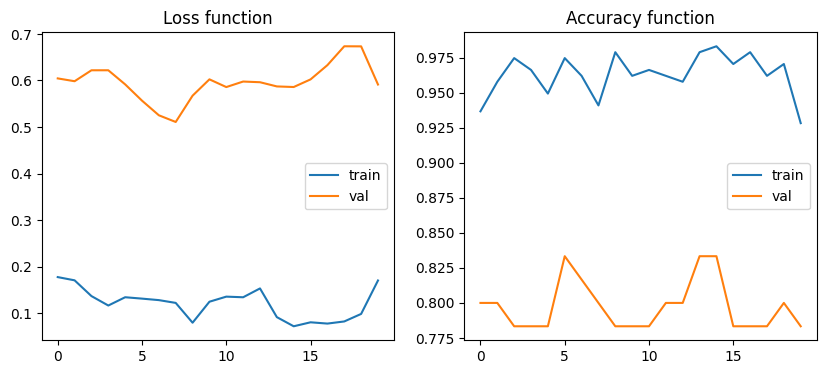

In [159]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss function')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy function')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()

In [160]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6279482245445251
Test accuracy: 0.8536585569381714


In [162]:
from sklearn.metrics import confusion_matrix, classification_report

In [163]:
y_predicted = model.predict(X_test)
y_predicted_classes = np.argmax(y_predicted, axis = 1) 

3/3 [==============================] - 0s 9ms/step


In [164]:
print(y_predicted[0])
print(y_test[0])
print(np.argmax(y_predicted[0]))
print(np.argmax(y_test[0]))

[9.98416662e-01 1.09454586e-05 8.53145495e-04 1.13993716e-04
 3.49938922e-08 5.57886204e-04 4.73508699e-05]
[1. 0. 0. 0. 0. 0. 0.]
0
0


In [166]:
print(y_predicted_classes.shape)
y_test_classes = np.argmax(y_test, axis = 1) 
print(y_test_classes.shape)

(82,)
(82,)


In [167]:
confusion_matrix= confusion_matrix(y_test_classes, y_predicted_classes)
print(confusion_matrix)

[[ 9  0  1  0  0  4  0]
 [ 1  5  0  1  0  0  1]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  3  0  1  0]
 [ 0  0  1  0 18  0  0]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  0  0 21]]


In [169]:
report = classification_report(y_test_classes, y_predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       1.00      0.62      0.77         8
           2       0.85      1.00      0.92        11
           3       0.75      0.75      0.75         4
           4       1.00      0.95      0.97        19
           5       0.38      0.60      0.46         5
           6       0.88      1.00      0.93        21

    accuracy                           0.85        82
   macro avg       0.82      0.80      0.79        82
weighted avg       0.88      0.85      0.86        82



In [171]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable

#import transforms as transforms
from skimage import io
from skimage.transform import resize
#from models import *

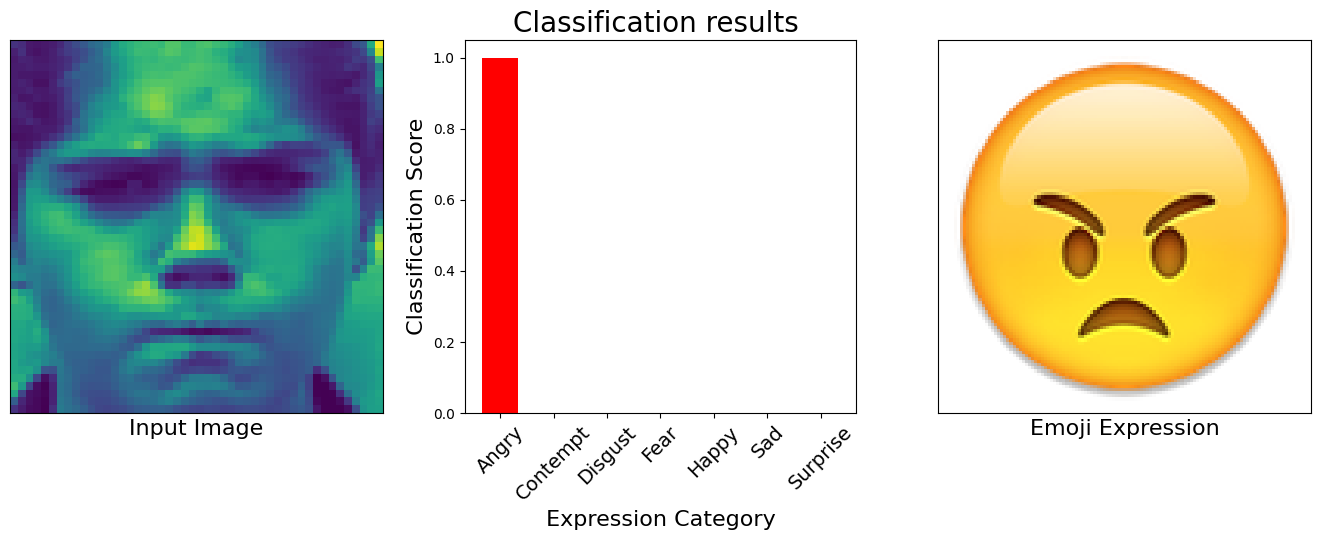

The Expression is Angry!


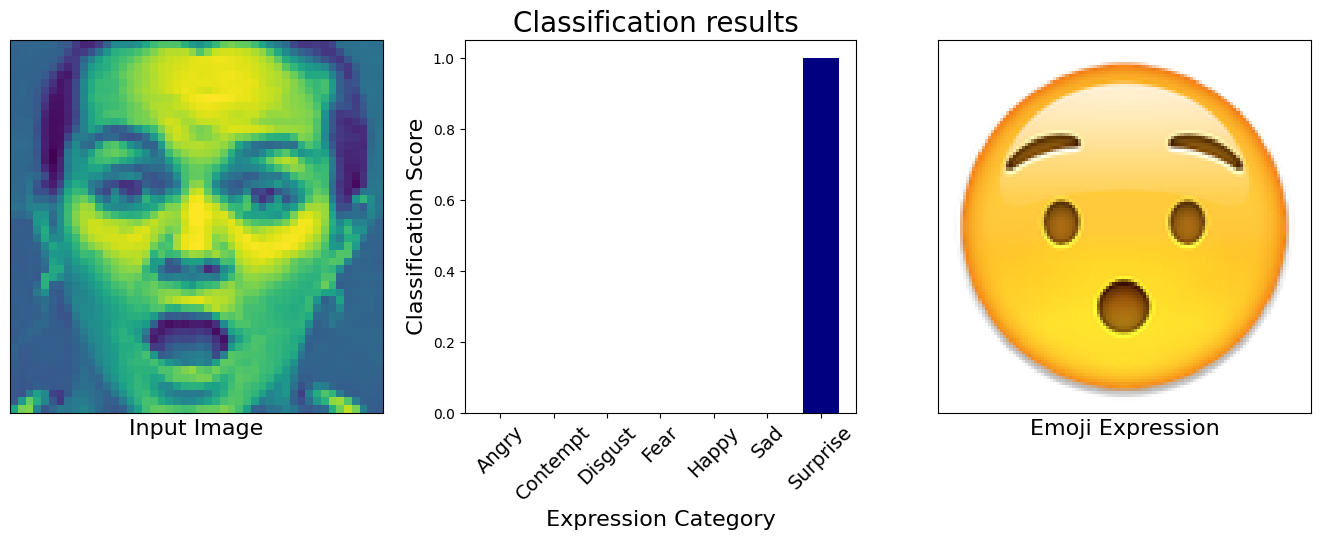

The Expression is Surprise!


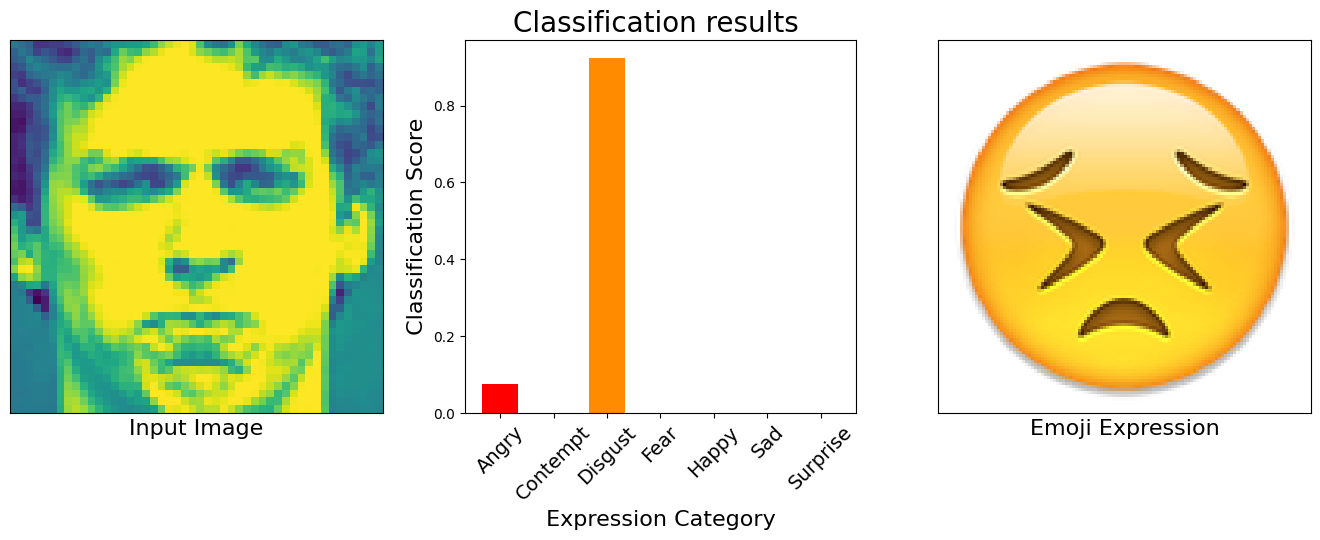

The Expression is Disgust!


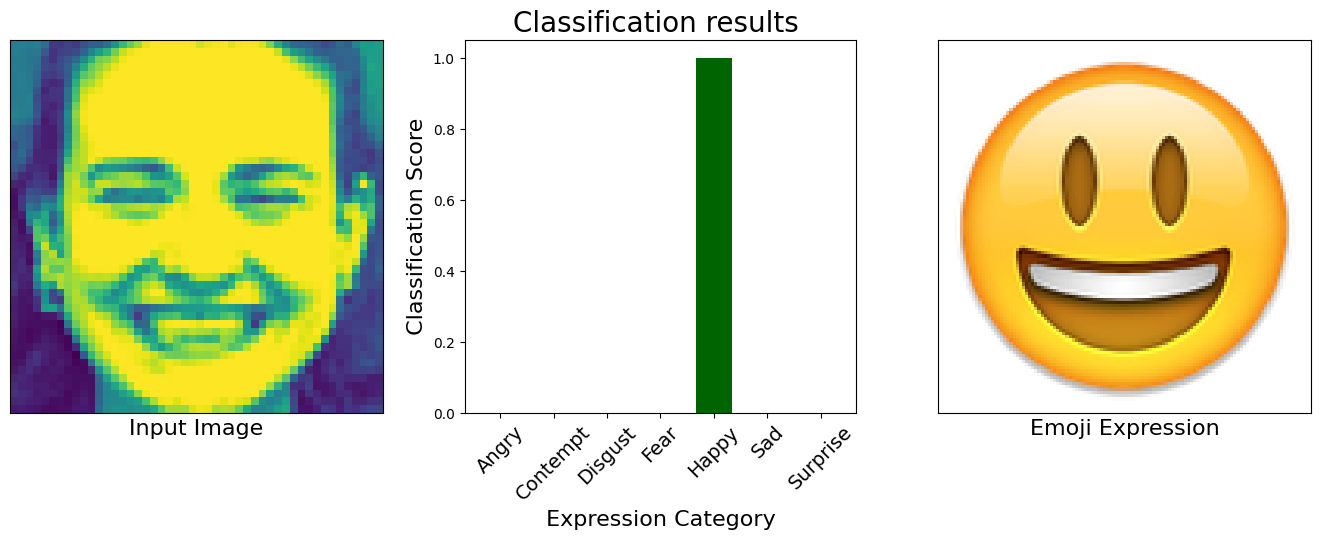

The Expression is Happy!


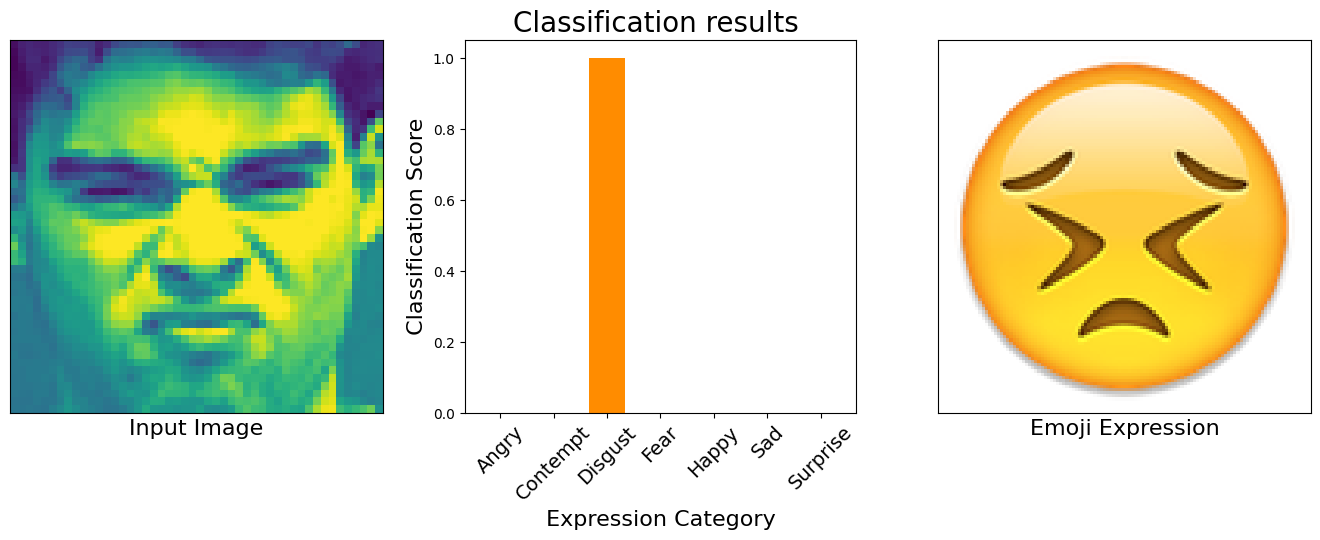

The Expression is Disgust!


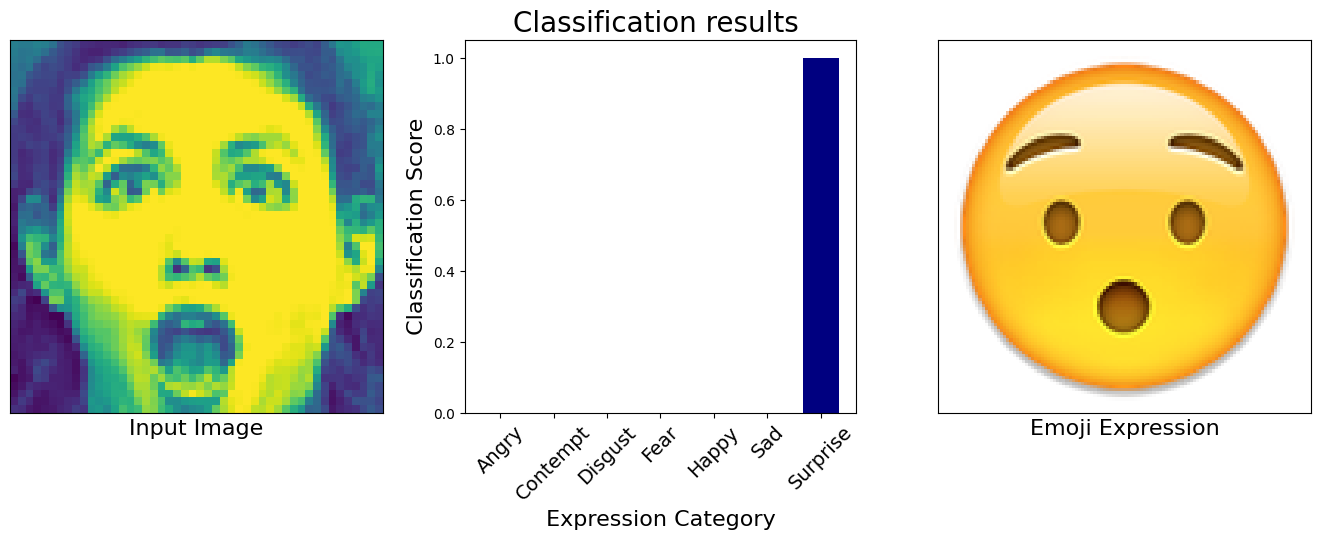

The Expression is Surprise!


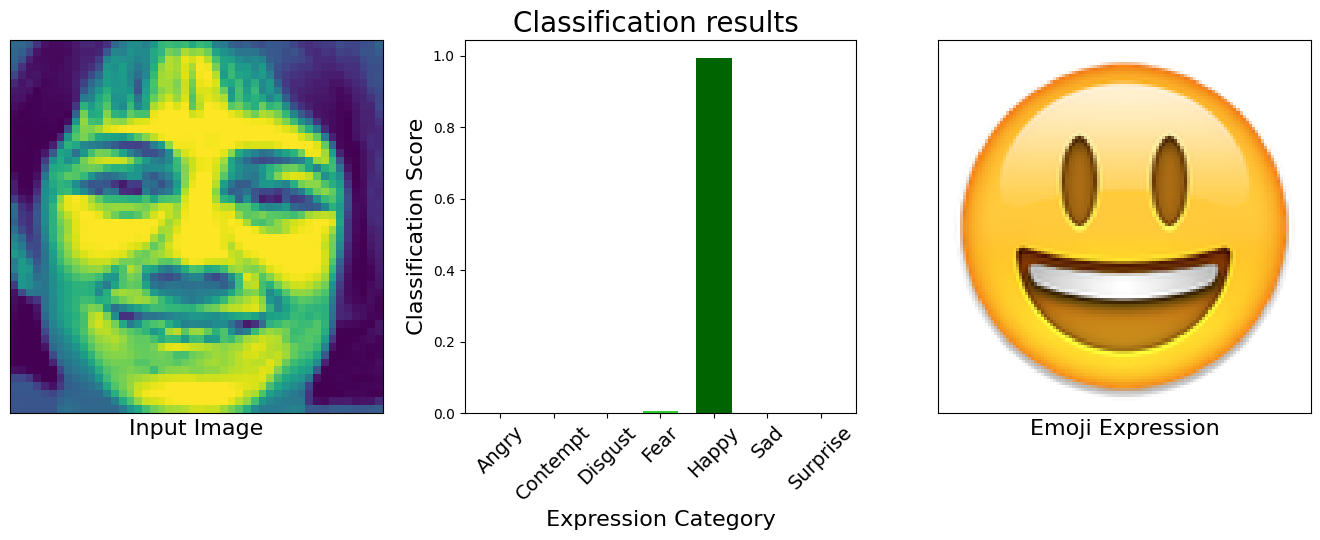

The Expression is Happy!


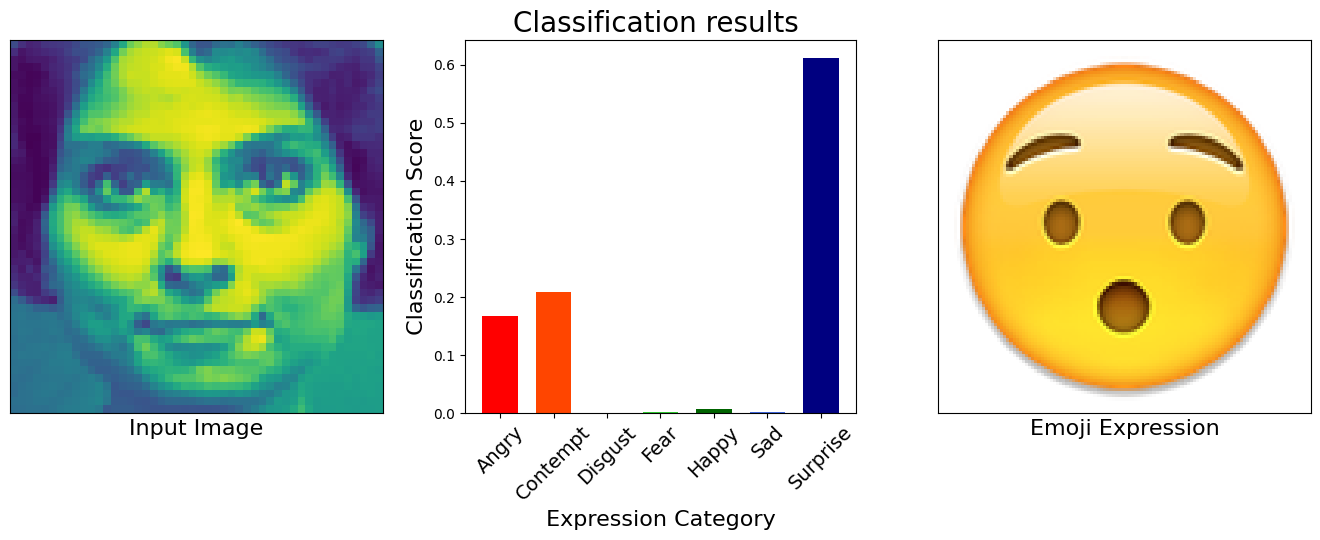

The Expression is Surprise!


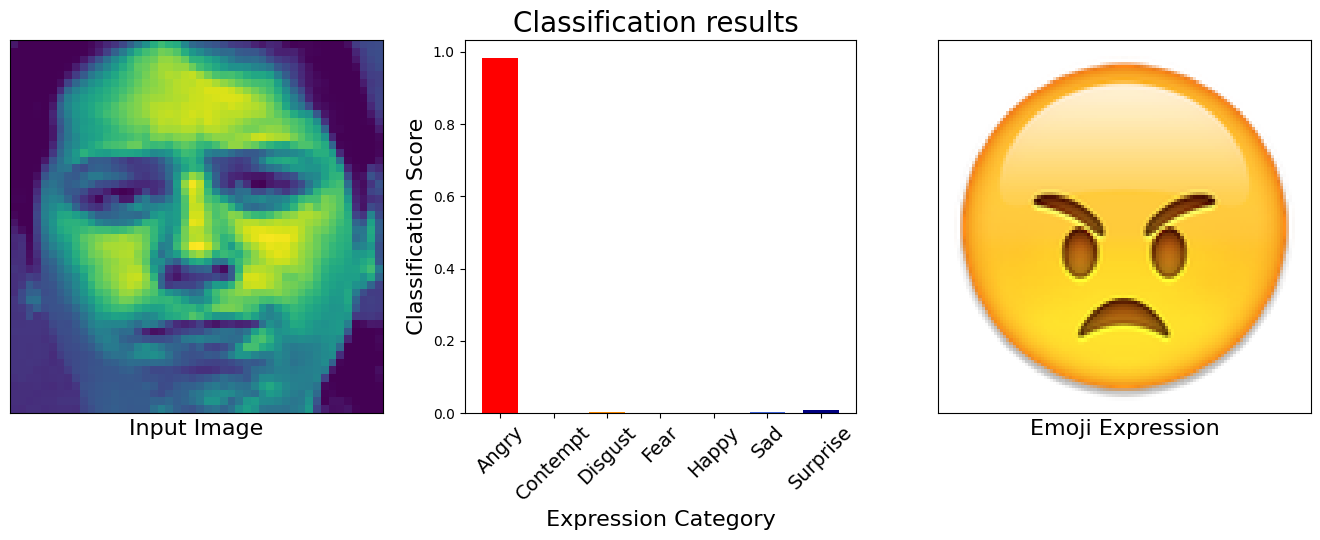

The Expression is Angry!


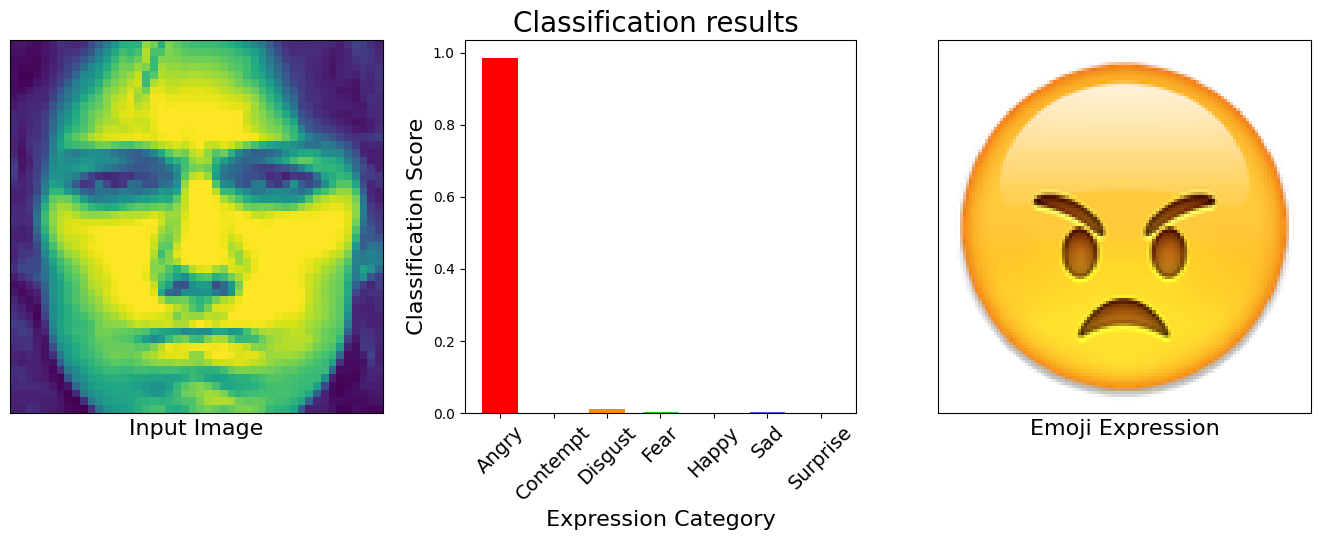

The Expression is Angry!


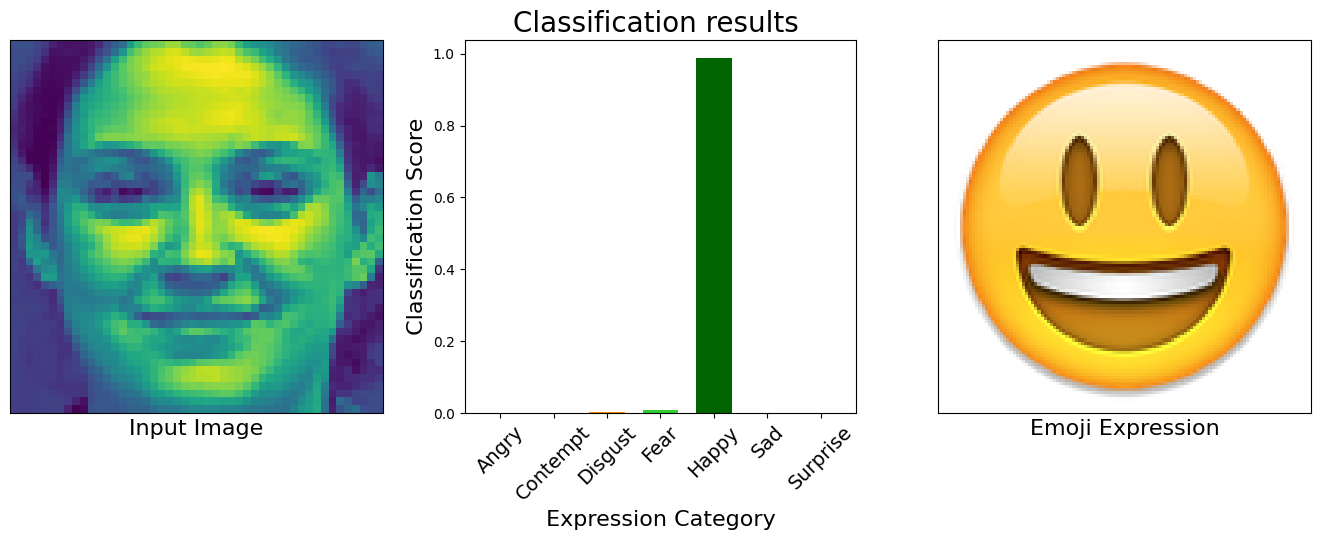

The Expression is Happy!


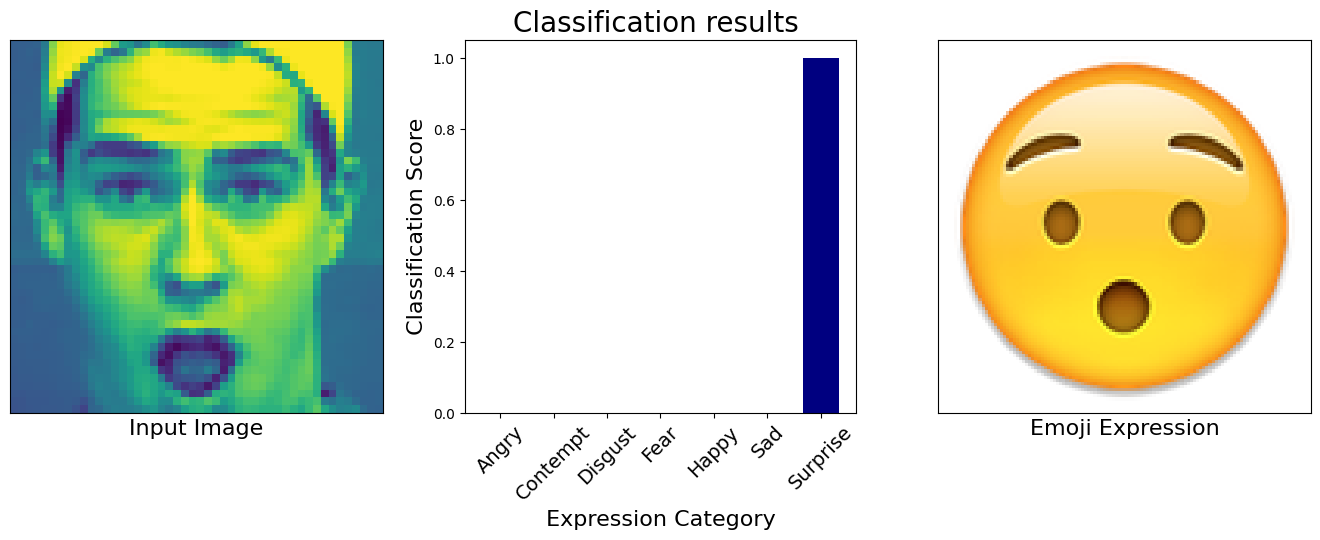

The Expression is Surprise!


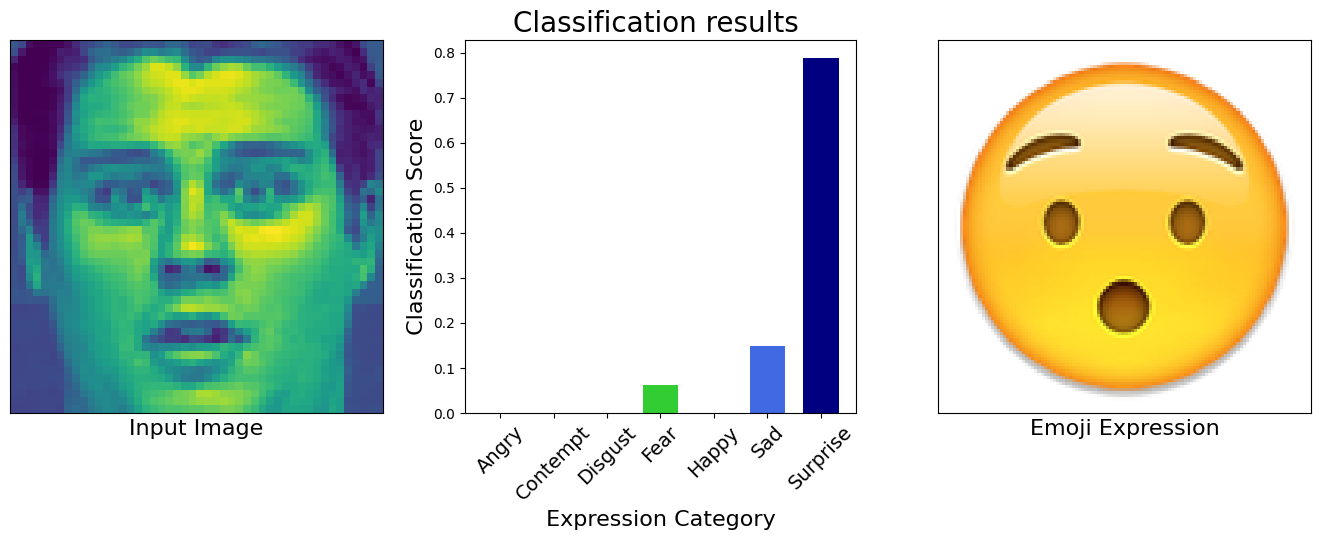

The Expression is Surprise!


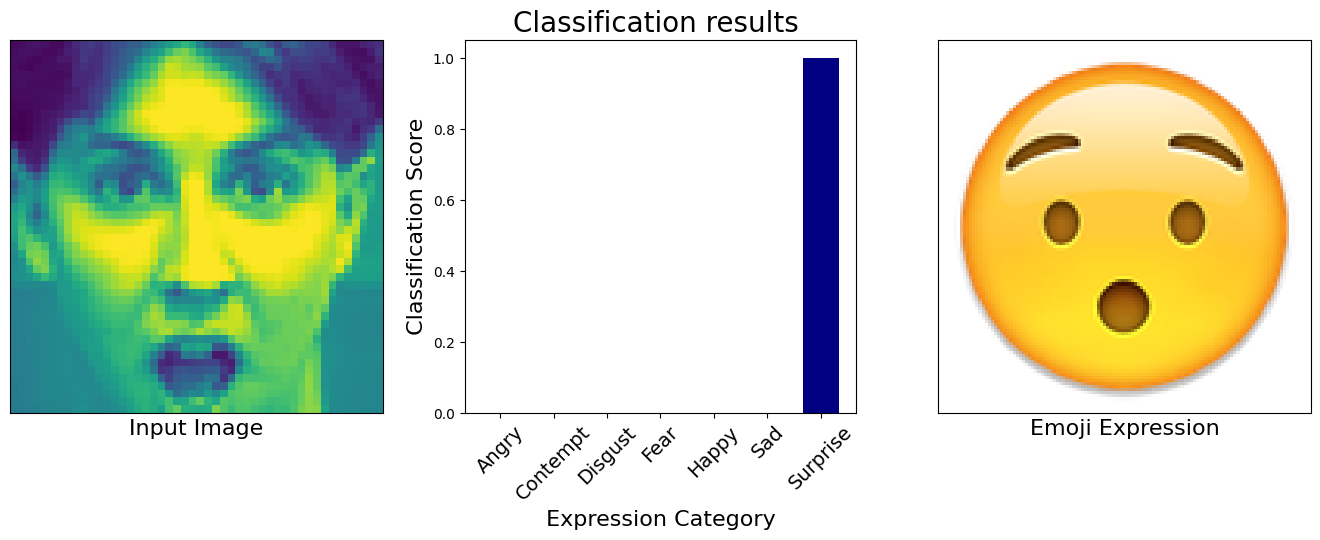

The Expression is Surprise!


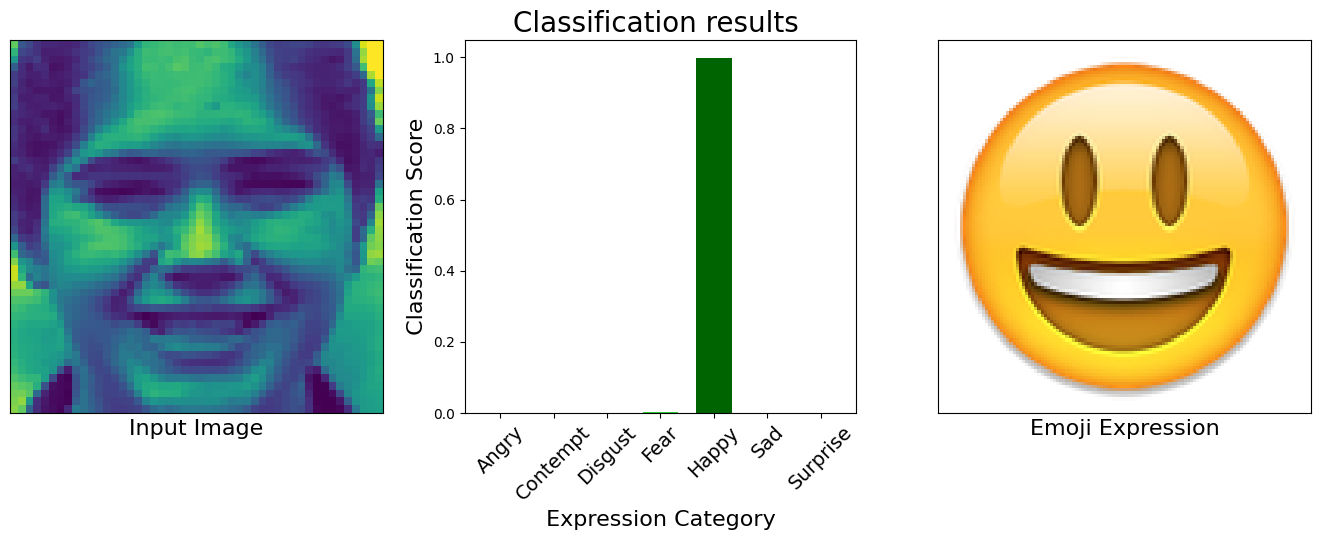

The Expression is Happy!


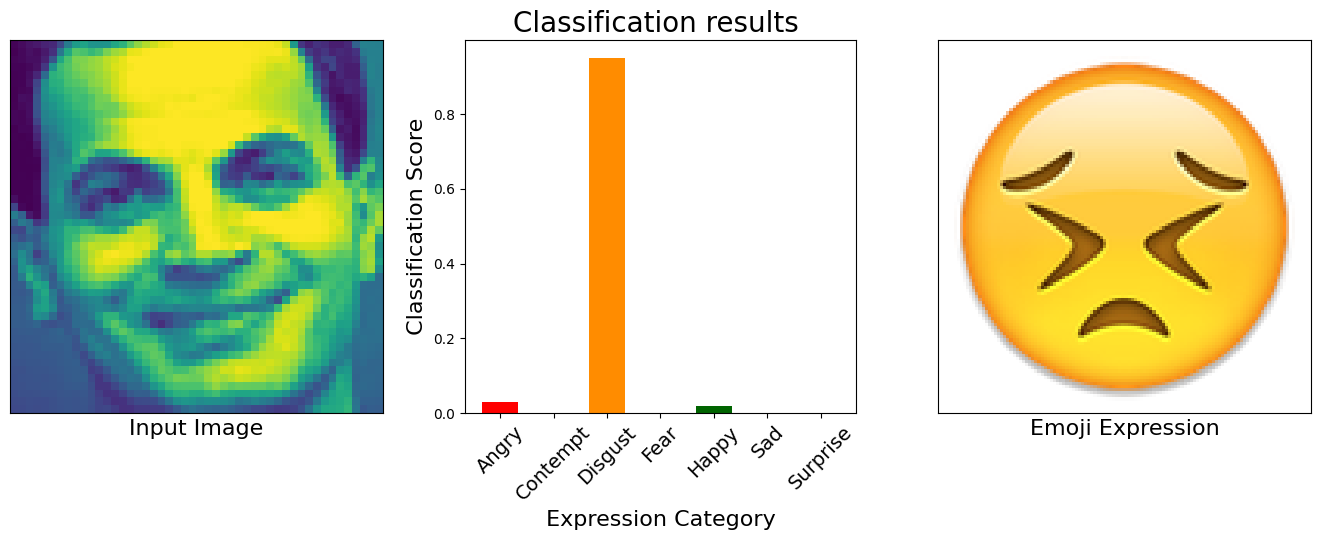

The Expression is Disgust!


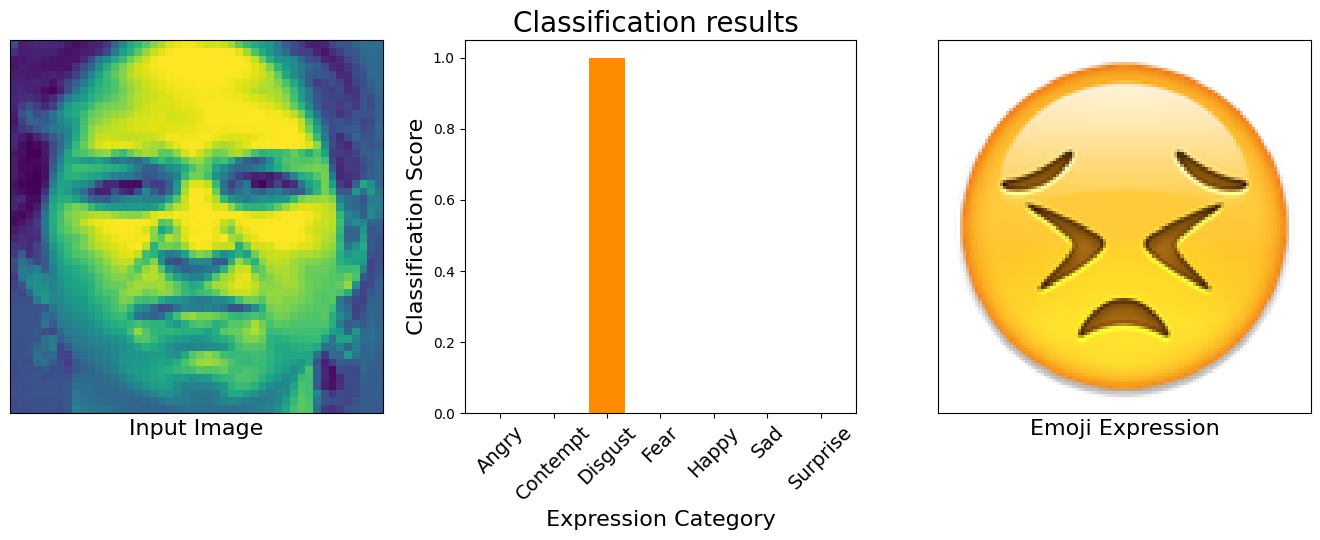

The Expression is Disgust!


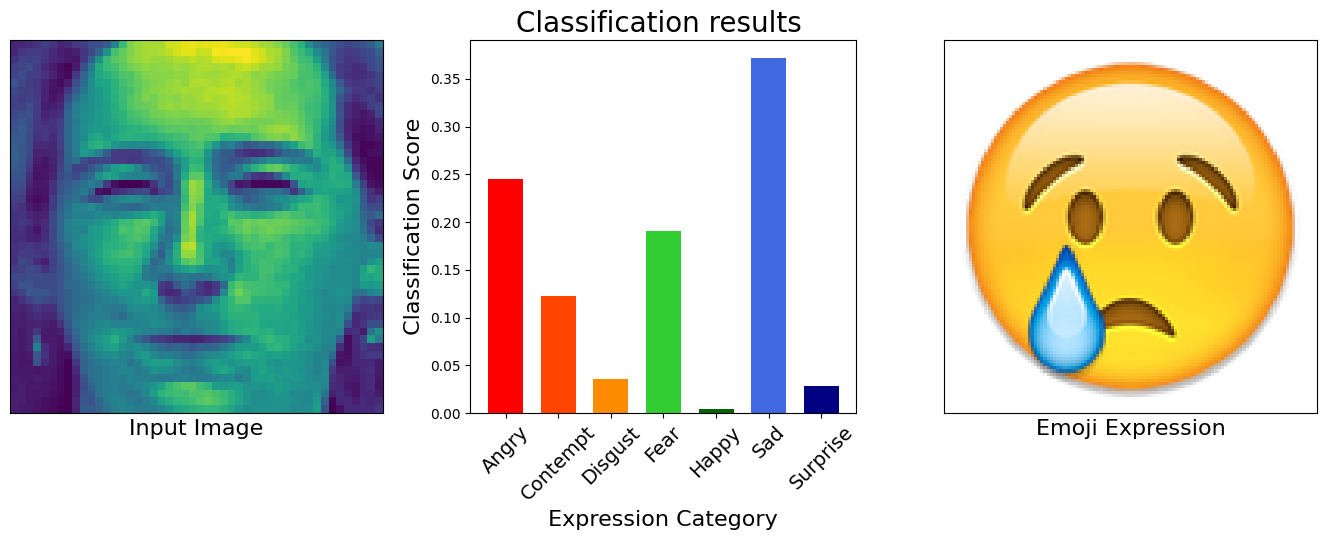

The Expression is Sad!


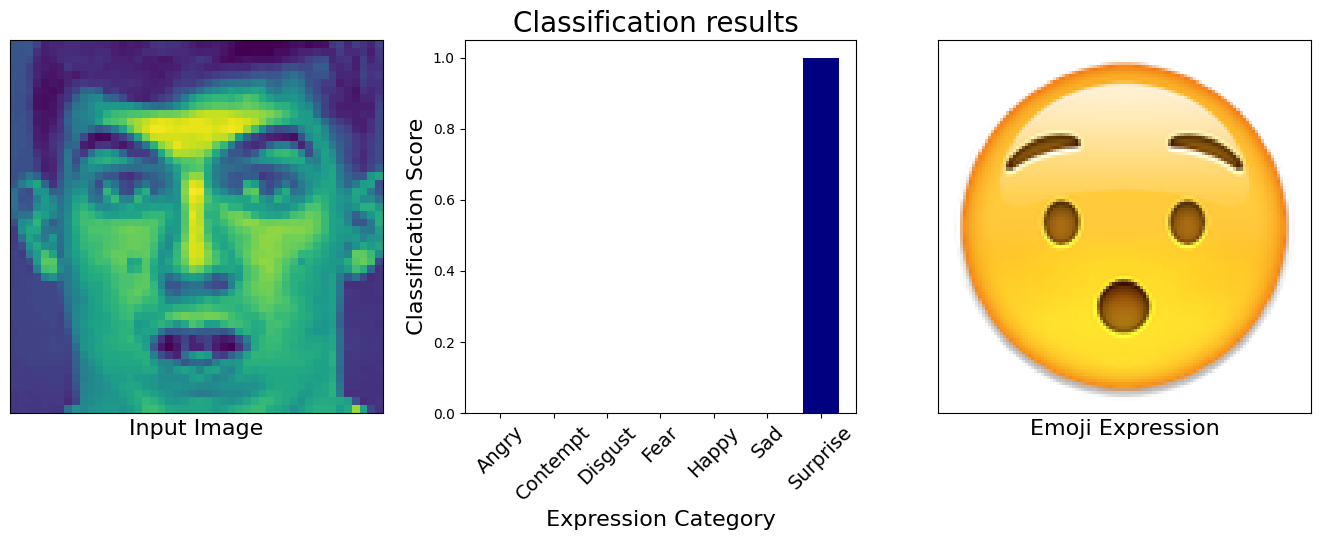

The Expression is Surprise!


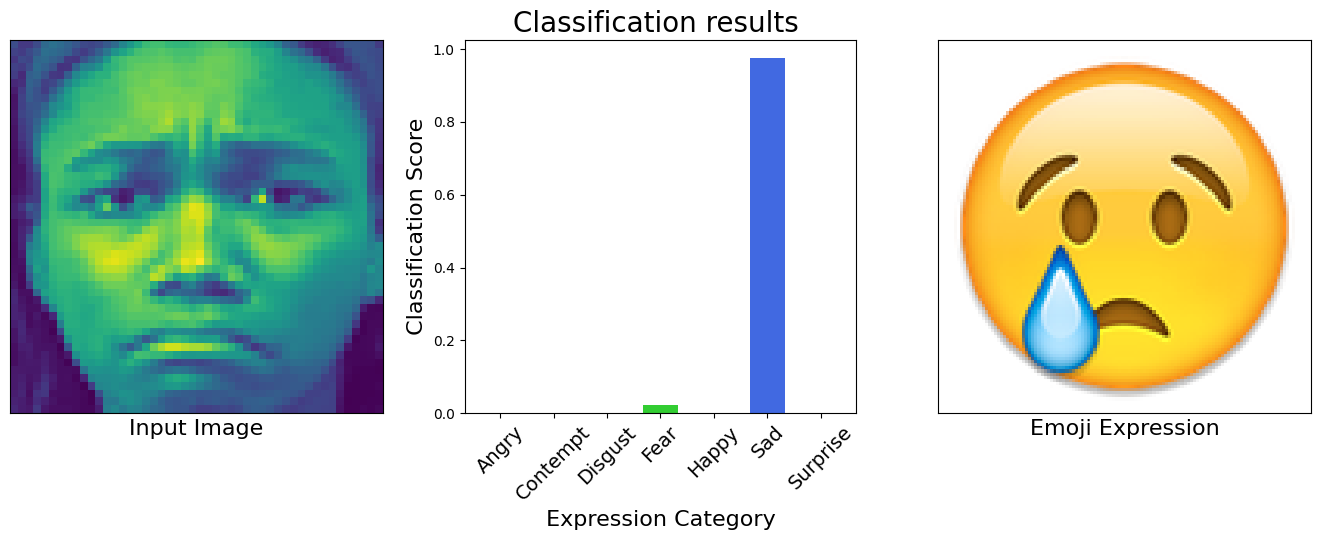

The Expression is Sad!


In [174]:
class_names = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy' ,'Sad', 'Surprise']


for j in range(20):
    plt.rcParams['figure.figsize'] = (13.5,5.5)
    axes=plt.subplot(1, 3, 1)
    #plt.imshow(raw_img)
    plt.imshow(X_test[j])
    plt.xlabel('Input Image', fontsize=16)
    axes.set_xticks([])
    axes.set_yticks([])
    plt.tight_layout()


    plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)

    plt.subplot(1, 3, 2)
    ind = 0.1+0.6*np.arange(len(class_names))    # the x locations for the groups
    width = 0.4       # the width of the bars: can also be len(x) sequence
    color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
    for i in range(len(class_names)):
        plt.bar(ind[i], y_predicted[j][i], width, color=color_list[i])
    plt.title("Classification results ",fontsize=20)
    plt.xlabel(" Expression Category ",fontsize=16)
    plt.ylabel(" Classification Score ",fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)

    axes=plt.subplot(1, 3, 3)
    emojis_img = io.imread('datasets/images/emojis/%s.png' % str(class_names[int(np.argmax(y_predicted[j]))]))
    plt.imshow(emojis_img)
    plt.xlabel('Emoji Expression', fontsize=16)
    axes.set_xticks([])
    axes.set_yticks([])
    plt.tight_layout()
    # show emojis

    plt.show()
    #plt.savefig(os.path.join('images/results/l.png'))
    plt.close()

    print("The Expression is %s!" %str(class_names[int(np.argmax(y_predicted[j]))]))